# Listing Gains Prediction Using TensorFlow

Data sourced from [moneycontrol](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true).

### Data Dictionary

| Column Name             | Description |
|-------------------------|-------------|
| **Date**               | Date when the IPO was listed |
| **IPOName**            | Name of the IPO |
| **Issue_Size**         | Size of the IPO issue, in INR Crores |
| **Subscription_QIB**   | Number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category |
| **Subscription_HNI**   | Number of times the IPO was subscribed by the HNI (High Networth Individual) investor category |
| **Subscription_RII**   | Number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category |
| **Subscription_Total** | Total number of times the IPO was subscribed overall |
| **Issue_Price**        | The price in INR at which the IPO was issued |
| **Listing_Gains_Percent** | Percentage gain in the listing price over the issue price |


## Import Libraries

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## Load & Examine Data

In [90]:
df = pd.read_csv('data/Indian_IPO_Market_Data.csv', parse_dates=['Date '])

I:\Temp\ipykernel_24704\2116053093.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data/Indian_IPO_Market_Data.csv', parse_dates=['Date '])


In [91]:
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,2010-03-02,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,2010-08-02,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,2010-02-15,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,2010-02-15,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,2010-02-19,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [92]:
df.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,2022-08-26,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,2022-06-09,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,2022-09-15,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,2022-09-26,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,2022-10-17,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   319 non-null    datetime64[ns]
 1   IPOName                319 non-null    object        
 2   Issue_Size             319 non-null    float64       
 3   Subscription_QIB       319 non-null    float64       
 4   Subscription_HNI       319 non-null    float64       
 5   Subscription_RII       319 non-null    float64       
 6   Subscription_Total     319 non-null    float64       
 7   Issue_Price            319 non-null    int64         
 8   Listing_Gains_Percent  319 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 22.6+ KB


In [94]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,NaN,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016-06-27 02:47:01.316614400,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
min,2010-01-07 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,2011-08-31 00:00:00,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,2017-03-10 00:00:00,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,2021-01-31 00:00:00,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,2022-11-04 00:00:00,NaN,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


## Explore Data

### Drop Unnecessary Columns

In [95]:
df.drop(columns=['Date ', 'IPOName'], inplace=True)

### Check Nulls

In [96]:
df.isnull().sum()

Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

### Create Categorical Target Variable

In [97]:
df['Listing_gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)

### Drop Old Column

In [98]:
df.drop(columns=['Listing_Gains_Percent'], inplace=True)

### Check Summary Statistics

In [99]:
df.describe(include='all')

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,0.545455
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,1.000000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,1.000000


### Check Target Class Distribution

In [100]:
df['Listing_gains_Profit'].value_counts(normalize=True)

Listing_gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

## Visualizations

### Visualize Boxplot per Column

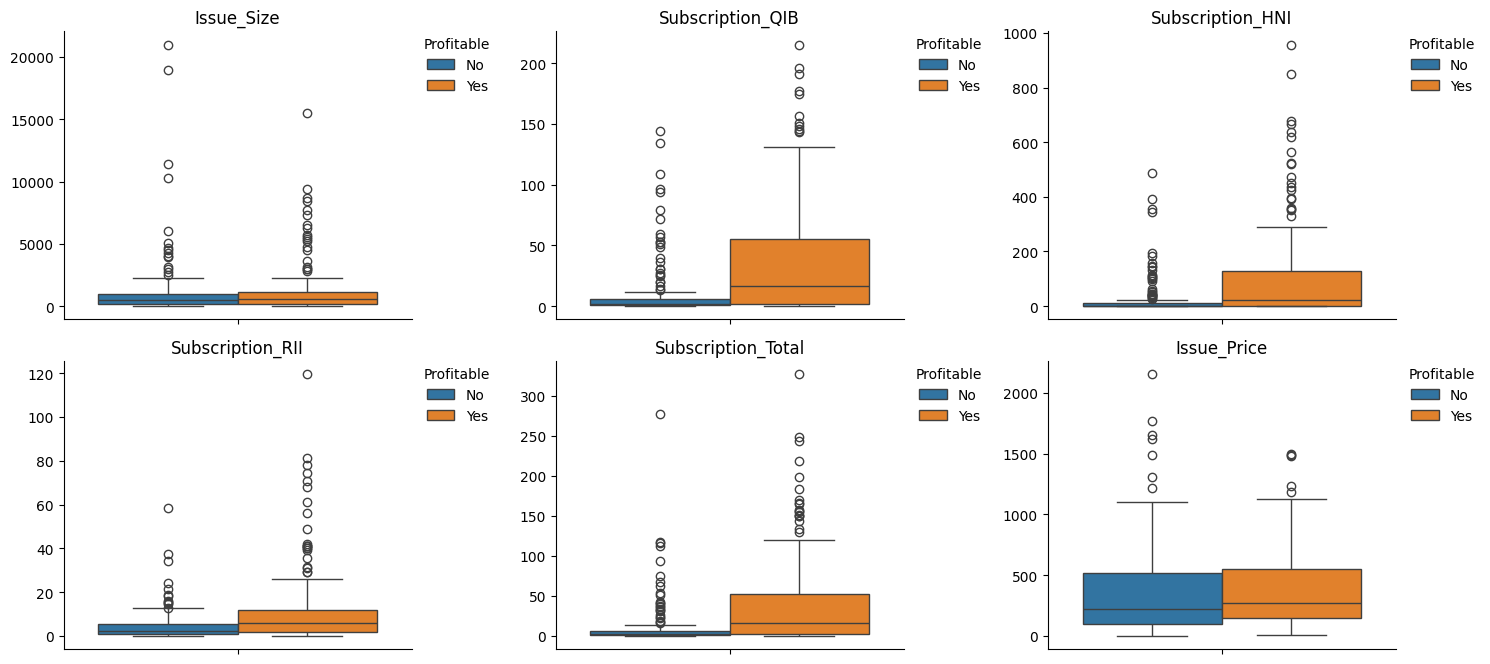

In [101]:
fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(df.drop(columns=['Listing_gains_Profit']).columns):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col, ax=ax, hue='Listing_gains_Profit')
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0, title='Profitable', labels=['No', 'Yes'], frameon=False)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
sns.despine()
plt.show()

### Visualize Distribution per Target Column Class

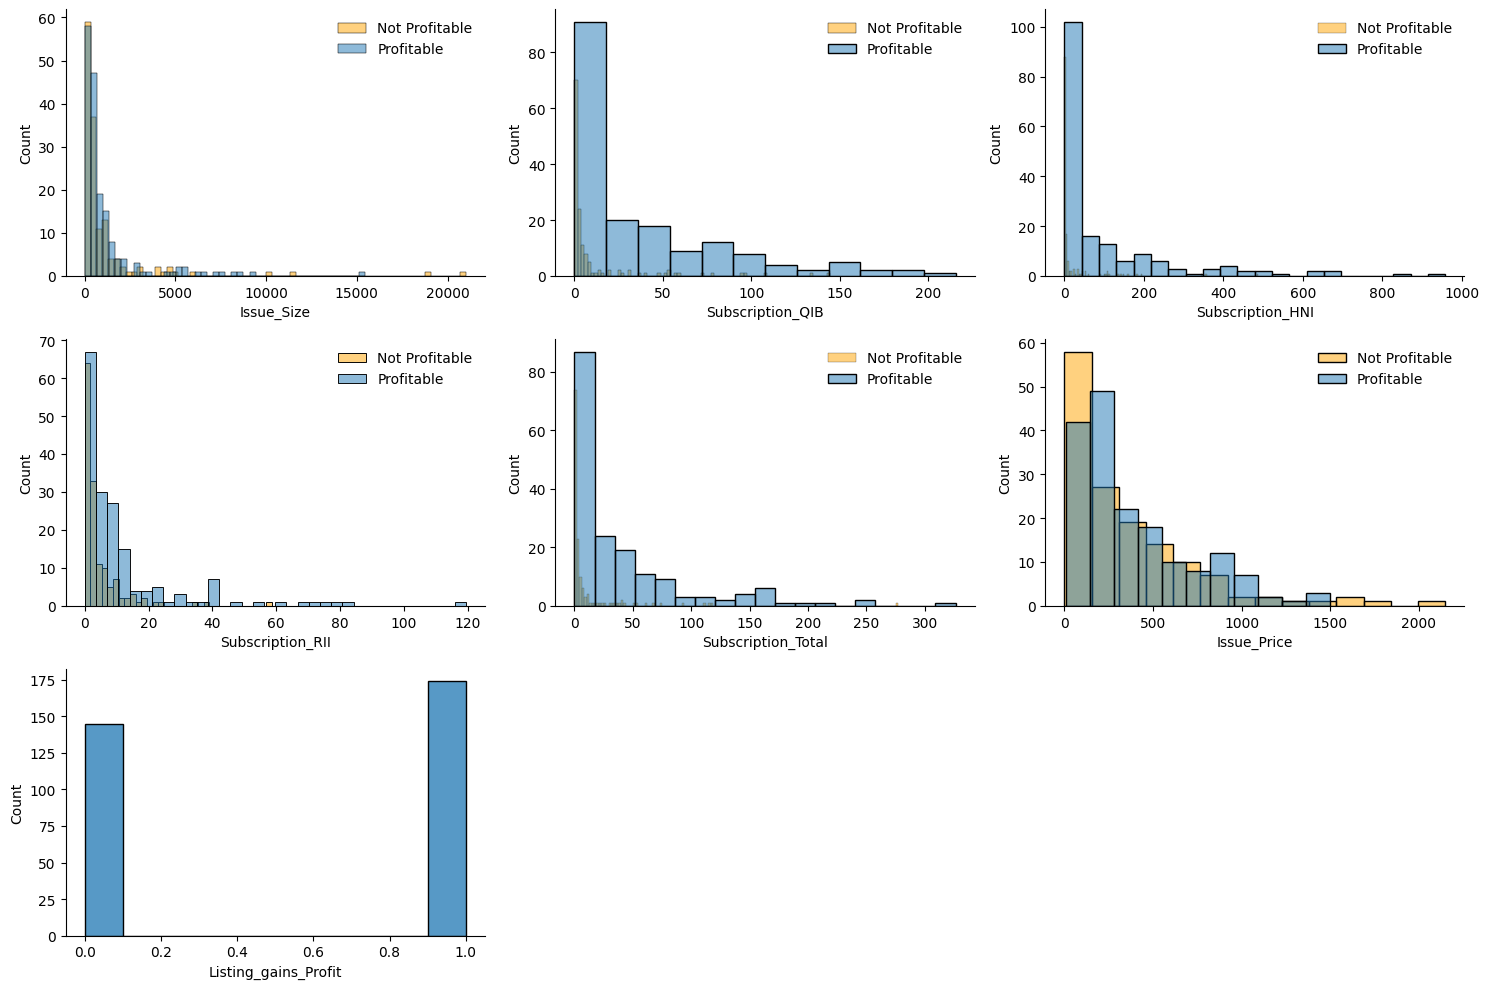

In [102]:
fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns):
    ax = fig.add_subplot(3, 3, i + 1)
    if col != 'Listing_gains_Profit':
        sns.histplot(data=df[df['Listing_gains_Profit'] == 0], x=col, color='orange', alpha=.5, ax=ax, label='Not Profitable')
        sns.histplot(data=df[df['Listing_gains_Profit'] == 1], x=col, alpha=.5, ax=ax, label='Profitable')
        plt.legend(frameon=False)
    else:
        sns.histplot(data=df, x=col, ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

### Visualize Relationships by Target Column Class

<Figure size 1500x1500 with 0 Axes>

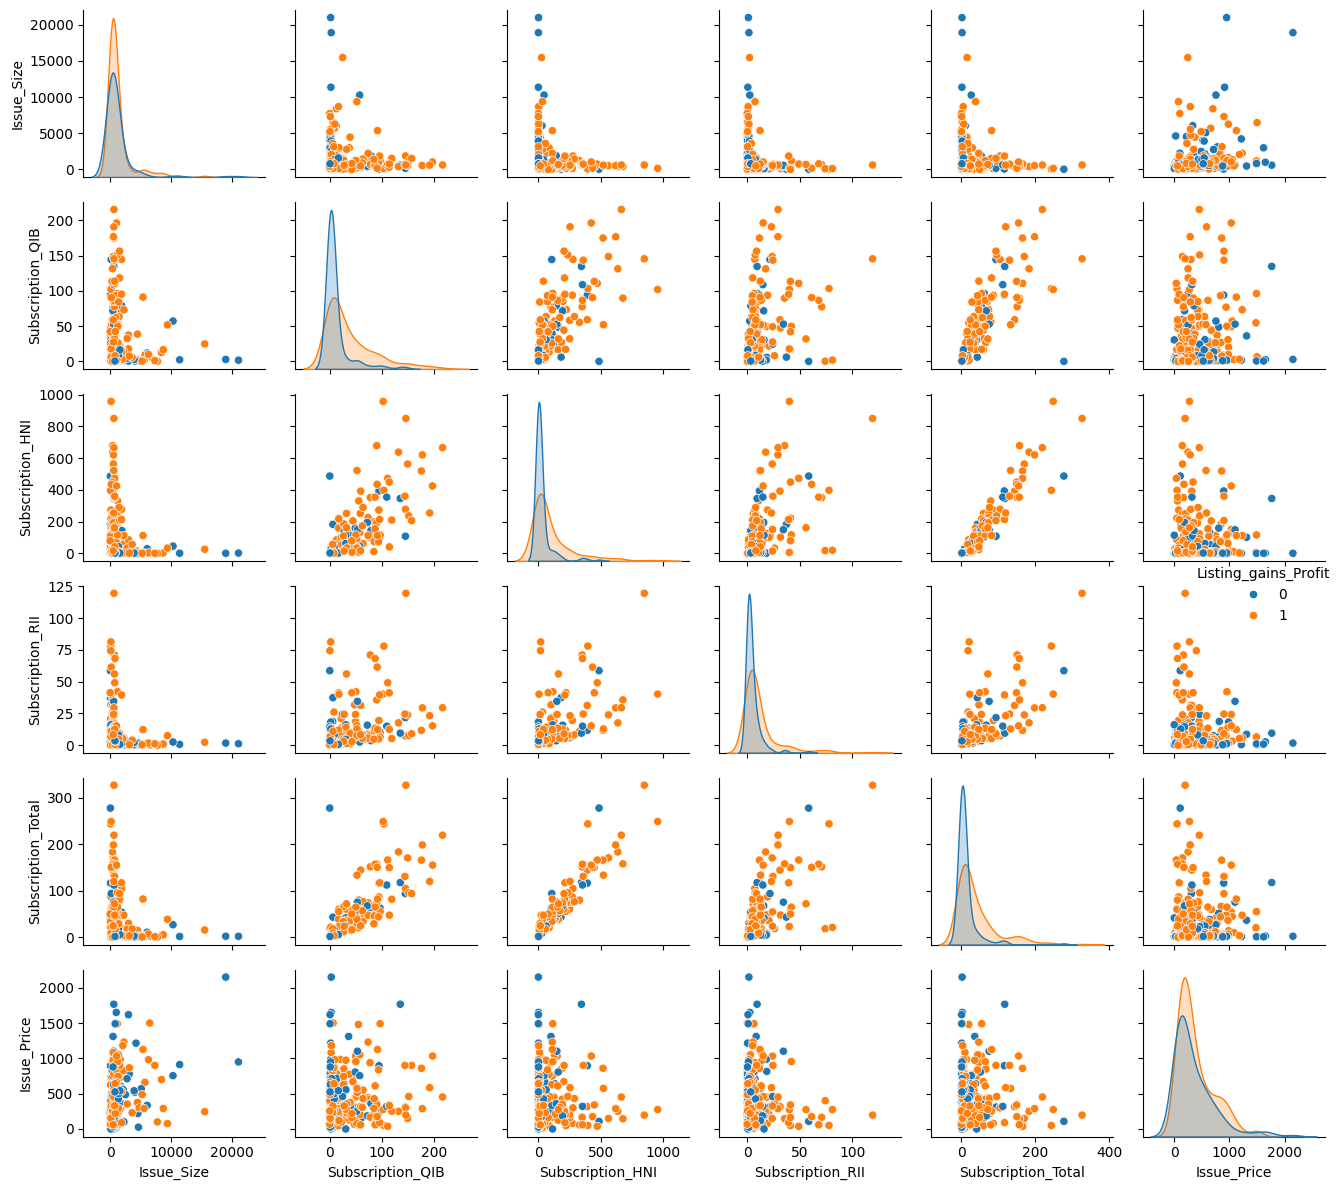

In [103]:
fig = plt.figure(figsize=(15, 15))

sns.pairplot(df, hue='Listing_gains_Profit', height=2)

plt.tight_layout()
sns.despine()
plt.show()

## Treat Outliers

In [104]:
for col in df.columns:
    print(col, df[col].skew())

Issue_Size 4.853401606434454
Subscription_QIB 2.143704625584823
Subscription_HNI 3.0784448213212667
Subscription_RII 3.7082740836630137
Subscription_Total 2.9119071381074786
Issue_Price 1.6968814842159945
Listing_gains_Profit -0.18343787550316024


In [105]:
for col in df:
    quartiles = np.percentile(df[col], [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)
    num_outliers =sum((df[col] < lower_bound) | (df[col] > upper_bound))

    print(f"The {col} column has {num_outliers} according to the boxplot method.")

The Issue_Size column has 34 according to the boxplot method.
The Subscription_QIB column has 35 according to the boxplot method.
The Subscription_HNI column has 48 according to the boxplot method.
The Subscription_RII column has 33 according to the boxplot method.
The Subscription_Total column has 31 according to the boxplot method.
The Issue_Price column has 12 according to the boxplot method.
The Listing_gains_Profit column has 0 according to the boxplot method.


In [106]:
for col in df.columns:
    quartiles = np.percentile(df[col], [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)
    
    df[col] = df[col].clip(lower_bound, upper_bound)
    
    num_outliers =sum((df[col] < lower_bound) | (df[col] > upper_bound))
    
    print(f"The {col} column has {num_outliers} according to the boxplot method.")

The Issue_Size column has 0 according to the boxplot method.
The Subscription_QIB column has 0 according to the boxplot method.
The Subscription_HNI column has 0 according to the boxplot method.
The Subscription_RII column has 0 according to the boxplot method.
The Subscription_Total column has 0 according to the boxplot method.
The Issue_Price column has 0 according to the boxplot method.
The Listing_gains_Profit column has 0 according to the boxplot method.


## Establish Features and Target

In [107]:
X = df.drop(columns=['Listing_gains_Profit'])
y = df['Listing_gains_Profit']

In [108]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [109]:
# Forward Selection

forward_features = []

for n in [2, 3, 4, 5]:

    selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=n, direction='forward')

    selector.fit(X, y)
    
    print(n, selector.get_feature_names_out())
    
    forward_features.append(selector.get_feature_names_out())

2 ['Subscription_QIB' 'Issue_Price']
3 ['Subscription_QIB' 'Subscription_Total' 'Issue_Price']
4 ['Subscription_QIB' 'Subscription_HNI' 'Subscription_Total' 'Issue_Price']
5 ['Subscription_QIB' 'Subscription_HNI' 'Subscription_RII'
 'Subscription_Total' 'Issue_Price']


In [110]:
# Backward Selection

backward_features = []

for n in [2, 3, 4, 5]:

    selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=n, direction='backward')

    selector.fit(X, y)

    print(n, selector.get_feature_names_out())
    
    backward_features.append(selector.get_feature_names_out())

2 ['Subscription_Total' 'Issue_Price']
3 ['Subscription_HNI' 'Subscription_Total' 'Issue_Price']
4 ['Subscription_QIB' 'Subscription_HNI' 'Subscription_Total' 'Issue_Price']
5 ['Subscription_QIB' 'Subscription_HNI' 'Subscription_RII'
 'Subscription_Total' 'Issue_Price']


## Select Features

In [111]:
X = X[backward_features[2]]
X.columns

Index(['Subscription_QIB', 'Subscription_HNI', 'Subscription_Total',
       'Issue_Price'],
      dtype='object')

## Normalize Features

In [112]:
# Normalize to between 0 and 1
X = X / X.max()

In [113]:
X.describe()

,Subscription_QIB,Subscription_HNI,Subscription_Total,Issue_Price
count,319.000000,319.000000,319.000000,319.000000
mean,0.253601,0.263157,0.252489,0.311793
std,0.342961,0.374477,0.335939,0.268853
min,0.000000,0.000000,0.000000,0.000000
25%,0.013551,0.008184,0.020304,0.102454
50%,0.058212,0.033061,0.060849,0.215239
75%,0.408131,0.404910,0.412182,0.461472
max,1.000000,1.000000,1.000000,1.000000


## Create Train/Test Split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape

(255, 4)

In [116]:
X_test.shape

(64, 4)

In [117]:
y_train.value_counts(normalize=True)

Listing_gains_Profit
1    0.564706
0    0.435294
Name: proportion, dtype: float64

In [118]:
y_test.value_counts(normalize=True)

Listing_gains_Profit
0    0.53125
1    0.46875
Name: proportion, dtype: float64

## Define Deep Learning Classification Model

In [119]:
model = tf.keras.Sequential()

### Add Layers

In [120]:
model.add(tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='elu'))
model.add(tf.keras.layers.Dense(8, activation='elu'))
model.add(tf.keras.layers.Dense(1))

### Establish Optimizer

In [121]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

### Compile

In [122]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


### Fit Model

In [124]:
model.fit(X_train, y_train, epochs=150, verbose=0)

## Evaluate Results

In [125]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7529


[0.47244638204574585, 0.7529411911964417]

In [126]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8921 - accuracy: 0.7344


[0.8921226263046265, 0.734375]

## PyTorch

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [128]:
X_train_tensor = torch.from_numpy(X_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()
y_train_tensor = torch.from_numpy(y_train.values).float()
y_test_tensor = torch.from_numpy(y_test.values).float()

In [129]:
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ELU(),
    nn.Linear(16, 8),
    nn.ELU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [130]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 150

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = F.binary_cross_entropy(outputs, y_train_tensor.unsqueeze(1))
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.7023
Epoch 1, Loss: 0.6907
Epoch 2, Loss: 0.6813
Epoch 3, Loss: 0.6747
Epoch 4, Loss: 0.6725
Epoch 5, Loss: 0.6706
Epoch 6, Loss: 0.6647
Epoch 7, Loss: 0.6567
Epoch 8, Loss: 0.6494
Epoch 9, Loss: 0.6432
Epoch 10, Loss: 0.6371
Epoch 11, Loss: 0.6319
Epoch 12, Loss: 0.6290
Epoch 13, Loss: 0.6299
Epoch 14, Loss: 0.6324
Epoch 15, Loss: 0.6323
Epoch 16, Loss: 0.6289
Epoch 17, Loss: 0.6246
Epoch 18, Loss: 0.6214
Epoch 19, Loss: 0.6200
Epoch 20, Loss: 0.6198
Epoch 21, Loss: 0.6199
Epoch 22, Loss: 0.6197
Epoch 23, Loss: 0.6189
Epoch 24, Loss: 0.6176
Epoch 25, Loss: 0.6157
Epoch 26, Loss: 0.6137
Epoch 27, Loss: 0.6123
Epoch 28, Loss: 0.6117
Epoch 29, Loss: 0.6113
Epoch 30, Loss: 0.6104
Epoch 31, Loss: 0.6092
Epoch 32, Loss: 0.6081
Epoch 33, Loss: 0.6066
Epoch 34, Loss: 0.6052
Epoch 35, Loss: 0.6045
Epoch 36, Loss: 0.6038
Epoch 37, Loss: 0.6030
Epoch 38, Loss: 0.6024
Epoch 39, Loss: 0.6015
Epoch 40, Loss: 0.6007
Epoch 41, Loss: 0.5998
Epoch 42, Loss: 0.5989
Epoch 43, Loss: 0.598

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

train_test_tensors = {"train": [X_train_tensor, y_train_tensor], "test": [X_test_tensor, y_test_tensor]}

for key, tensor_list in train_test_tensors.items():
    X, y = tensor_list
    model.eval()
    with torch.no_grad():
        test_outputs = model(X)
        predicted_labels = (test_outputs > 0.5).float()
        predicted_labels = predicted_labels.cpu().numpy()
        y_true = y.cpu().numpy()

    accuracy = accuracy_score(y_true, predicted_labels)
    precision = precision_score(y_true, predicted_labels)
    recall = recall_score(y_true, predicted_labels)
    f1 = f1_score(y_true, predicted_labels)
    auc = roc_auc_score(y_true, test_outputs.cpu().numpy())

    print(f"--- Metrics for {key} data:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

--- Metrics for train data:
Accuracy: 0.7569
Precision: 0.7847
Recall: 0.7847
F1-Score: 0.7847
AUC: 0.8278
--- Metrics for test data:
Accuracy: 0.7031
Precision: 0.7037
Recall: 0.6333
F1-Score: 0.6667
AUC: 0.6539
